In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\download\kaggle_data_set\toko_sembako\penjualan barang.csv', sep = ';')

In [3]:
df.head()

,Unnamed: 0,tanggal,nama_pembeli,nama_barang,kuantum,nominal
0,1,02/01/2020,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2,02/01/2020,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,3,02/01/2020,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,4,02/01/2020,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,5,02/01/2020,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0


In [4]:
df.columns

Index(['Unnamed: 0', 'tanggal', 'nama_pembeli', 'nama_barang', 'kuantum',
       'nominal'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0      0
tanggal         0
nama_pembeli    0
nama_barang     0
kuantum         0
nominal         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1289 non-null   int64  
 1   tanggal       1289 non-null   object 
 2   nama_pembeli  1289 non-null   object 
 3   nama_barang   1289 non-null   object 
 4   kuantum       1289 non-null   float64
 5   nominal       1289 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.5+ KB


In [7]:
df1 = df.copy()
df1.drop(['Unnamed: 0','nama_pembeli','nama_barang','kuantum'], axis = 1, inplace = True)
df1

,tanggal,nominal
0,02/01/2020,9840000.0
1,02/01/2020,8400000.0
2,02/01/2020,62910000.0
3,02/01/2020,4855200.0
4,02/01/2020,1162000.0
...,...,...
1284,08/04/2021,4389600.0
1285,08/04/2021,2718750.0
1286,08/04/2021,1065120.0
1287,09/04/2021,1200000.0


In [8]:
df1[['hari','bulan','tahun']] = df1['tanggal'].str.split('/', expand = True)

In [9]:
train = df1[df1['tahun']=='2020']
train = train.drop(['hari','bulan'], axis = 1)
train = train.groupby('tanggal')['nominal'].mean().reset_index()
train['tanggal'] = pd.to_datetime(train['tanggal'], dayfirst = True)
train['nominal'] = train['nominal'].astype(int)
train = train.sort_values(by = 'tanggal')

In [10]:
test = df1[df1['tahun']=='2021']
test = test.drop(['hari','bulan'], axis = 1)
test = test.groupby('tanggal')['nominal'].mean().reset_index()
test['tanggal'] = pd.to_datetime(test['tanggal'], dayfirst = True)
test['nominal'] = test['nominal'].astype(int)
test = test.sort_values(by = 'tanggal')

In [11]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 2 to 147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  151 non-null    datetime64[ns]
 1   nominal  151 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 7 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  34 non-null     datetime64[ns]
 1   nominal  34 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 680.0 bytes


(None, None)

In [12]:
import matplotlib.pyplot as plt

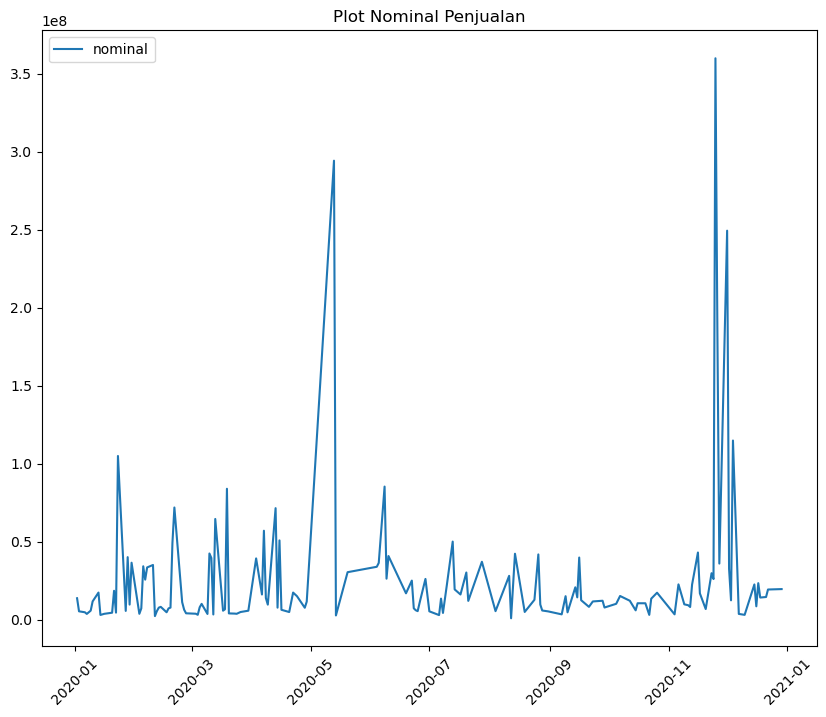

In [13]:
plt.figure(figsize = (10,8))
plt.plot(train['tanggal'], train['nominal'], label = 'nominal')
plt.xticks(rotation=45)
plt.title('Plot Nominal Penjualan')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(data, autolag = 'AIC')
    print(f'1. ADF : {dftest[0]}')
    print(f'2. P-value : {dftest[1]}')
    print(f'3. Lags : {dftest[2]}')
    print('4. nilai kritis :')
    for key, val in dftest[4].items():
        print('\t', key, ': ',val)

In [15]:
ad_test(train['nominal'])

1. ADF : -4.81129910800512
2. P-value : 5.1742826643432356e-05
3. Lags : 3
4. nilai kritis :
	 1% :  -3.4756368462466662
	 5% :  -2.8814104466172608
	 10% :  -2.5773652982553568


In [16]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [17]:
model_terbaik = auto_arima(train['nominal'], trace = True, 
                          suppres_warnings = True)
model_terbaik.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5759.165, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5762.924, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5760.885, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5761.671, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5801.324, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5761.149, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5760.158, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5752.282, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5750.785, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5750.537, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5760.487, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5749.662, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=5751.688, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=5751.674, Time=0.53 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -2868.831
Date:                Sat, 16 Dec 2023   AIC                           5749.662
Time:                        23:19:15   BIC                           5767.766
Sample:                             0   HQIC                          5757.017
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.59e+07   7.94e-10      2e+16      0.000    1.59e+07    1.59e+07
ar.L1          0.1435      0.045      3.157      0.002       0.054       0.233
ar.L2          0.0959      0.091      1.052      0.293      -0.083       0.274
ar.L3          0.2856      0.054      5.269      0.000       0.179       0.392
ar.L4         -0.1382      0.100     -1.379      0.168      -0.335       0.058
sigma2        1.9e+15   5.71e-17   3.33e+31      0.000     1.9e+15     1.9e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7755.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.02   Skew:                             5.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+46. Standard errors may be unstable.
"""

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['nominal'], order=(4, 0, 0))
model_fit=model.fit()
predictions = model_fit.predict(steps=len(train))

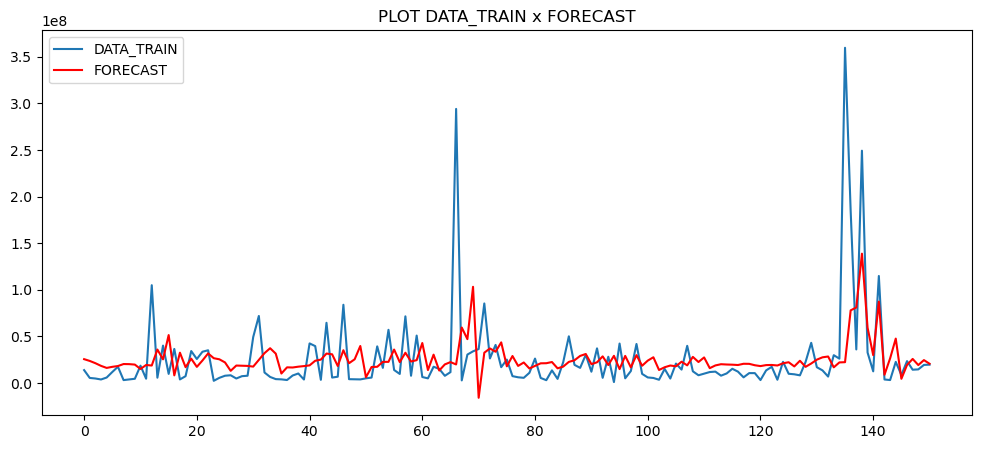

In [19]:
plt.figure(figsize = (12,5))
plt.plot(range(len(train)), train['nominal'], label = 'DATA_TRAIN')
plt.plot(range(len(predictions)), predictions, c = 'red', label = 'FORECAST')
plt.title('PLOT DATA_TRAIN x FORECAST')
plt.legend()
plt.show()

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                nominal   No. Observations:                  151
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -2868.827
Date:                Sat, 16 Dec 2023   AIC                           5749.653
Time:                        23:19:16   BIC                           5767.757
Sample:                             0   HQIC                          5757.008
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.564e+07    3.8e-10   6.74e+16      0.000    2.56e+07    2.56e+07
ar.L1          0.1453      0.048      3.058      0.002       0.052       0.238
ar.L2          0.0981      0.094      1.043      0.297      -0.086       0.283
ar.L3          0.2878      0.054      5.336      0.000       0.182       0.393
ar.L4         -0.1363      0.104     -1.312      0.190      -0.340       0.067
sigma2        1.9e+15    5.5e-17   3.45e+31      0.000     1.9e+15     1.9e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7764.35
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.03   Skew:                             5.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.16e+45. Standard errors may be unstable.
"""

In [21]:
model = ARIMA(test['nominal'], order=(4, 0, 0))
model_fit=model.fit()
prediksi = model_fit.predict(steps=len(train))

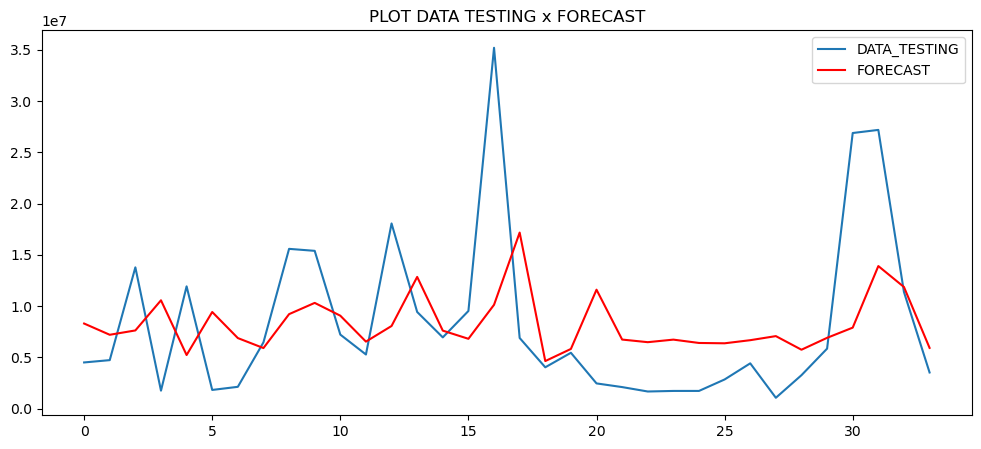

In [22]:
plt.figure(figsize = (12,5))
plt.plot(range(len(test)), test['nominal'], label = 'DATA_TESTING')
plt.plot(range(len(test)), prediksi, c = 'red', label = 'FORECAST')
plt.title('PLOT DATA TESTING x FORECAST')
plt.legend()
plt.show()